In [36]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/gpfslocalsup/pub/anaconda-py3/2020.02/envs/tensorflow-gpu-2.3.0/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std', 'det']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [188]:
from astropy.io import fits
#filename = '/gpfswork/rech/xdy/commun/nfw_samples/65_130_.5_3e14_1/0.148/samples_0.148_'
#filename = '/linkhome/rech/genpuc01/utb76xl/jax-lensing/scripts/results/cluster/detection/6e14/samples_0.148_6e14_'
#filename = '/linkhome/rech/genpuc01/utb76xl/jax-lensing/scripts/results/cluster/detection/9e14/samples_0.148_9e14_'
filename = '/linkhome/rech/genpuc01/utb76xl/jax-lensing/scripts/results/cluster/detection/9e13/samples_0.148_9e13_'

#filename = '/linkhome/rech/genpuc01/utb76xl/jax-lensing/scripts/results/cluster/65_130_.5_3e14_1/old/samples_0.07_'filename = '/linkhome/rech/genpuc01/utb76xl/jax-lensing/scripts/results/cluster/65_130_.5_3e14_1/old/samples_0.21_'
samples148 = fits.getdata(filename+'1.fits')

for i in range(2,21):
    if (i != 34) and (i != 36) and (i != 38) and (i != 39) :
        s = fits.getdata(filename+str(i)+'.fits')
        #samples01 = np.concatenate([samples01, s], axis=1)
        samples148 = np.concatenate([samples148, s], axis=1)

print(samples148.shape)

(3, 180, 129600)


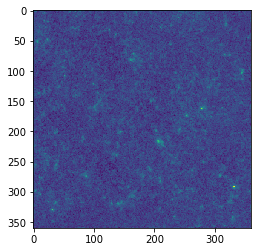

In [189]:
imshow(samples148[2,10,...].reshape(360,360))

In [190]:
img = samples148[-1,...].reshape(-1,360,360)

In [191]:
x=65
y=130

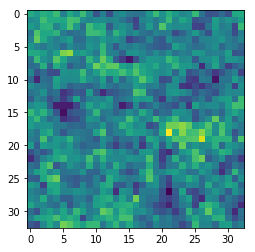

In [192]:
w = 16
ind = 4
imshow(img[ind,:][x-w:x+w+1, y-w:y+w+1])

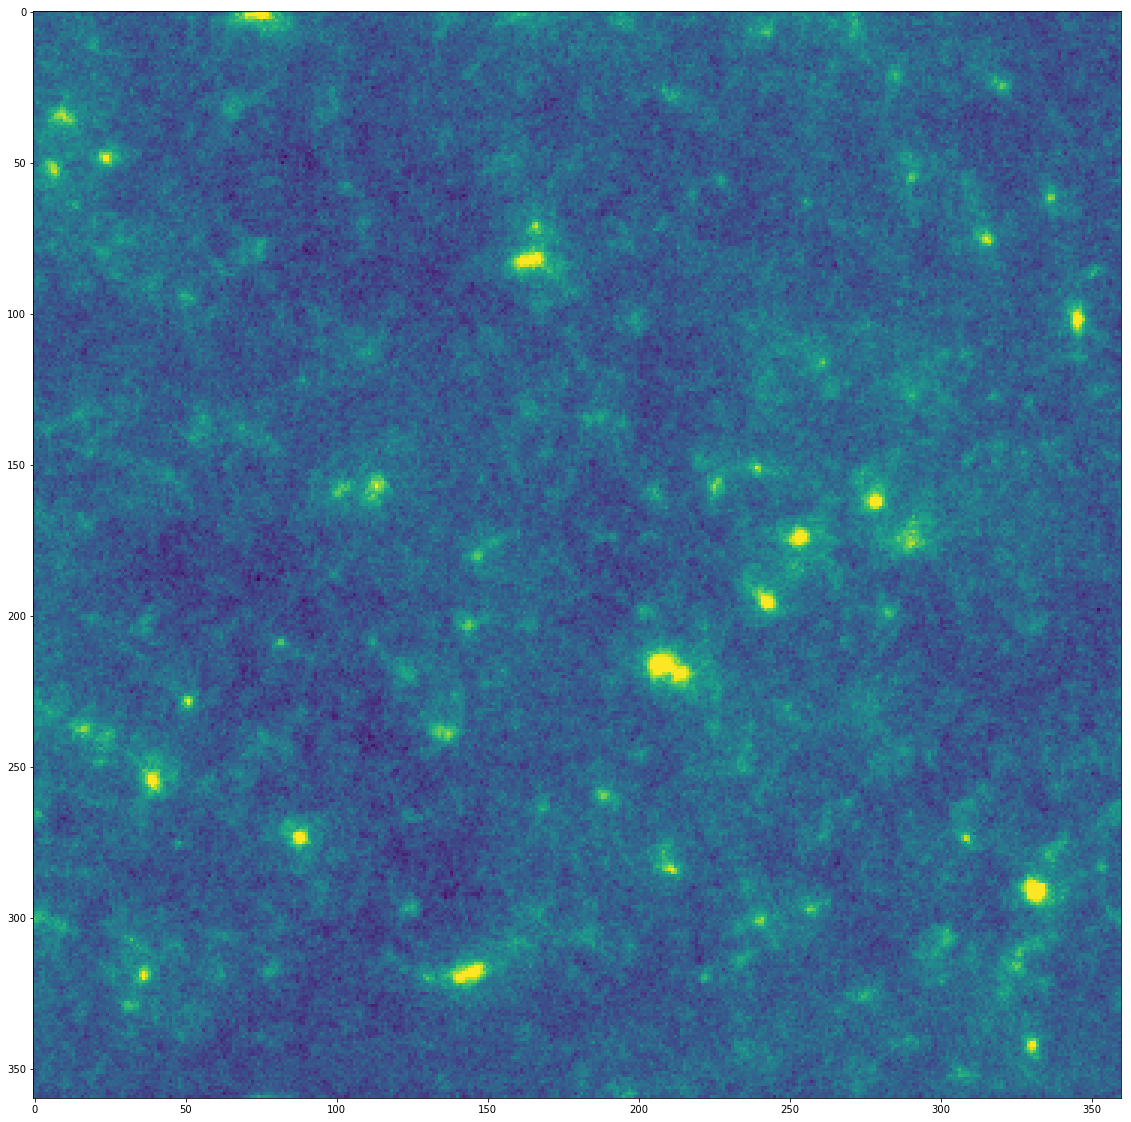

In [193]:
figure(figsize=[20,20])
imshow(img.mean(axis=0),vmax=0.15)

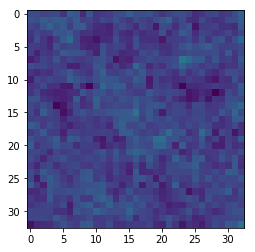

In [194]:
imshow(img[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0),vmax=0.15)

In [195]:
#filename = '/gpfswork/rech/xdy/commun/nfw_samples/background/samples_no_cluster_0.148_'
#filename = '/linkhome/rech/genpuc01/utb76xl/jax-lensing/scripts/results/cluster/65_130_.5_3e14_1/old/background/samples_no_cluster_0.07_'
#filename = '/linkhome/rech/genpuc01/utb76xl/jax-lensing/scripts/results/cluster/65_130_.5_3e14_1/old/background/samples_no_cluster_0.21_'
filename = '/linkhome/rech/genpuc01/utb76xl/jax-lensing/scripts/results/cluster/detection/background/samples_0.148_6e14_'
samplesback = fits.getdata(filename+'1.fits')

for i in range(2,21):
    if (i != 34) and (i != 36) and (i != 38) and (i != 39) :
        s = fits.getdata(filename+str(i)+'.fits')
        #samples01 = np.concatenate([samples01, s], axis=1)
        samplesback = np.concatenate([samplesback, s], axis=1)

print(samplesback.shape)

(3, 180, 129600)


In [196]:
img_background = samplesback[-1,...].reshape(-1,360,360)

Text(0.5,1,'mean cluster')

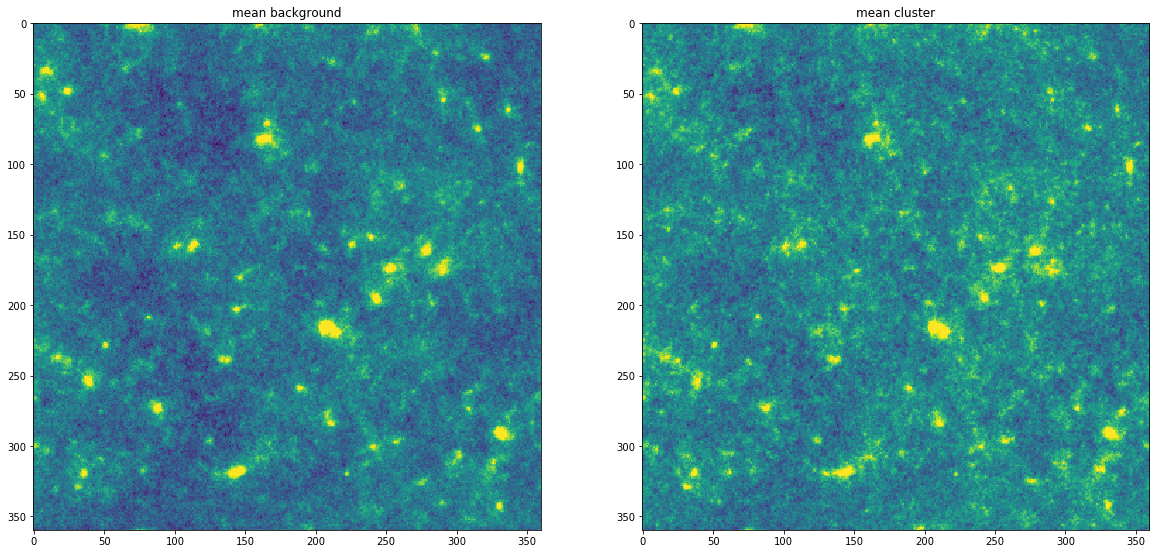

In [197]:
figure(figsize=[20,10])
subplot(121)
imshow(img_background.mean(axis=0),vmax=0.1)
title('mean background')
subplot(122)
imshow(img[:27].mean(axis=0),vmax=0.1)
title('mean cluster')

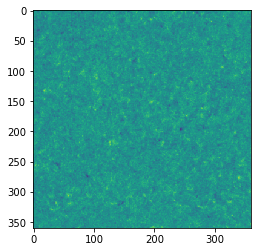

In [198]:
imshow(img[:27].mean(axis=0) - img_background.mean(axis=0))

Text(0.5,1,'mean background')

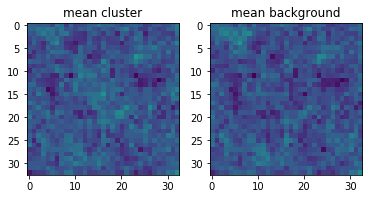

In [199]:
subplot(121)
imshow(img[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0),vmax=0.1)
title('mean cluster')
subplot(122)
imshow(img_background[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0),vmax=0.1)
title('mean background')

In [200]:
import lenspack

In [201]:
radius = linspace(0,16,16)

In [232]:
lenspack.image.filters.aperture_mass?

In [ ]:
def detection_filter(samples, std, w, filter_name='jbj04'):
    
    filtered_img = [lenspack.image.filters.aperture_mass(img[i,x-w:x+w+1, y-w:y+w+1],
                                                         rad,
                                                         filter=filter)
                    for i in range(len(img))]
    
    det = filtered_img[:, 16,16]/std > 5.
    non_det = filtered_img[:, 16,16]/std < 5.
    
    return where(det)[0].shape[0]/len(det)

In [203]:
# filter : {'s98', 'vw98', 'jbj04', 'starlet'}
filter='jbj04'

In [204]:
res = [lenspack.image.filters.aperture_mass(img[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0), i, filter=filter ) for i in radius]
res = np.stack(res,axis=0)

In [205]:
resb = [lenspack.image.filters.aperture_mass(img_background[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0), i, filter=filter) for i in radius]
resb = np.stack(resb,axis=0)

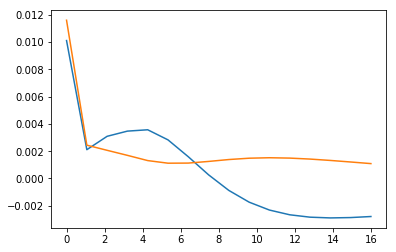

In [206]:
plot(radius, res[:,16,16])
plot(radius, resb.reshape([16,-1]).std(axis=1))

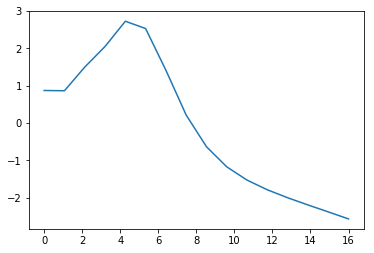

In [207]:
plot(radius, res[:,16,16]/resb.reshape([16,-1]).std(axis=1))

In [208]:
std = resb.reshape([16,-1]).std(axis=1)[6]
rad = radius[6]
rad, std

(6.4, 0.0011259939141606138)

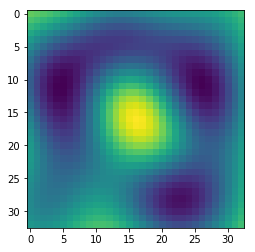

In [209]:
imshow(lenspack.image.filters.aperture_mass(img[:,x-w:x+w+1, y-w:y+w+1].mean(axis=0), rad, filter=filter))

In [210]:
filtered_img = [lenspack.image.filters.aperture_mass(img[i,x-w:x+w+1, y-w:y+w+1], rad, filter=filter) for i in range(len(img))]

In [211]:
filtered_back = [lenspack.image.filters.aperture_mass(img_background[i,x-w:x+w+1, y-w:y+w+1], rad, filter=filter) for i in range(len(img_background))]

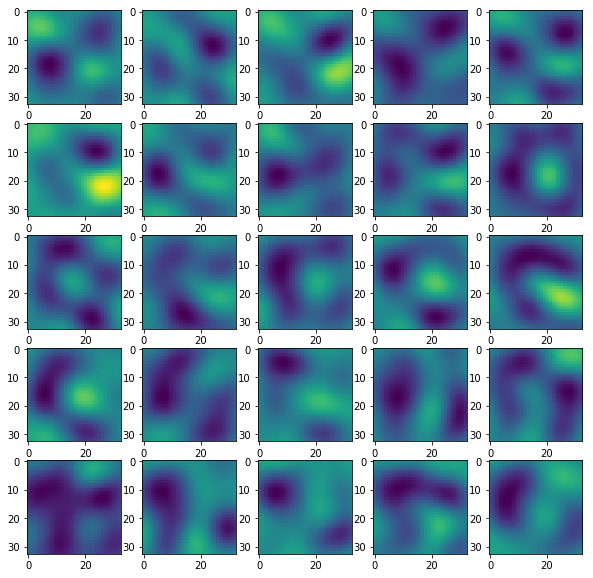

In [212]:
figure(figsize=[10,10])
try:
  for i in range(25):
    subplot(5,5,i+1)
    imshow(filtered_img[i]/std,vmax=10)
except ValueError:
  pass

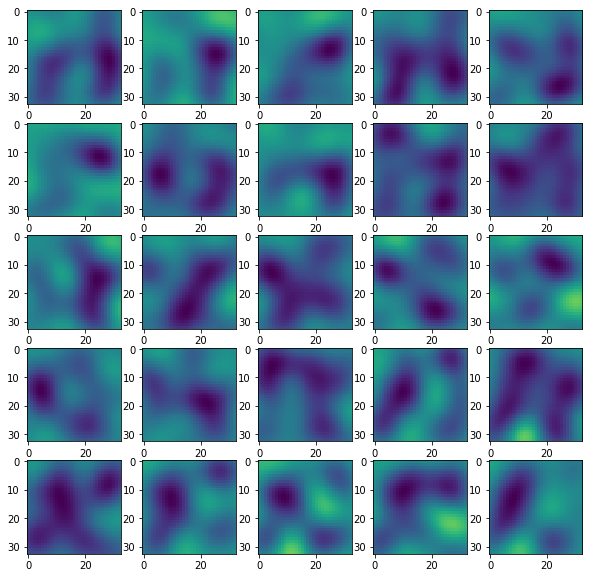

In [213]:
figure(figsize=[10,10])
try:
  for i in range(25):
    subplot(5,5,i+1)
    imshow(filtered_back[i]/std,vmax=10)
except IndexError:
  pass

In [214]:
filtered_img = np.stack(filtered_img,axis=0)

In [215]:
filtered_back = np.stack(filtered_back,axis=0)

In [216]:
filtered_img.shape, filtered_back.shape

((180, 33, 33), (180, 33, 33))

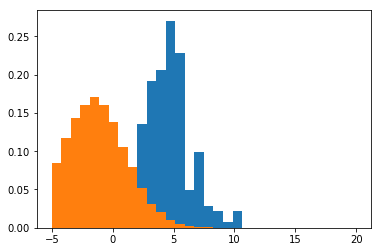

In [217]:
hist(filtered_img.reshape([180, -1]).max(axis=1)/std, 32, range=[-5,20],density=True);
hist(filtered_back.flatten()/std, 32, range=[-5,20],density=True);

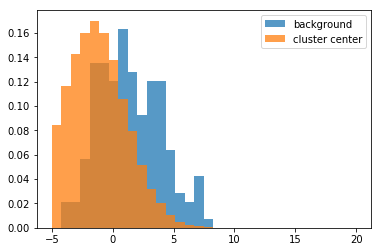

In [218]:
hist(filtered_img[:, 16,16]/std, 32, range=[-5,20],density=True,alpha=0.75,label='background');
hist(filtered_back.flatten()/std, 32, range=[-5,20],density=True,alpha=0.75,label='cluster center');
legend()

In [219]:
# ok, so let's pick a detection threshold around 5 sigma

In [220]:
det = filtered_img[:, 16,16]/std > 5.
non_det = filtered_img[:, 16,16]/std < 5.

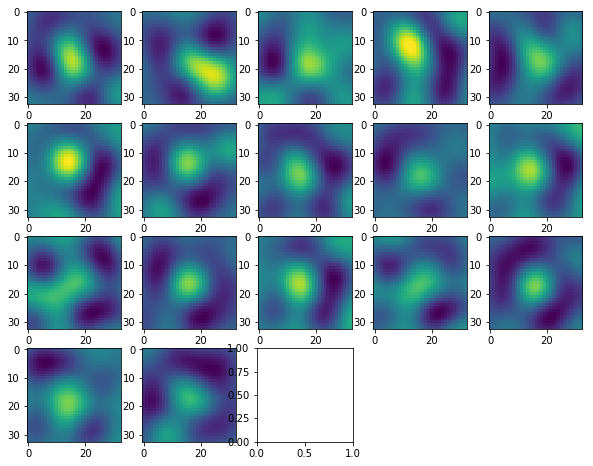

In [222]:
figure(figsize=[10,10])
try:
  for i in range(25):
    subplot(5,5,i+1)
    imshow(filtered_img[det][i]/std,vmax=10)
except IndexError:
  pass

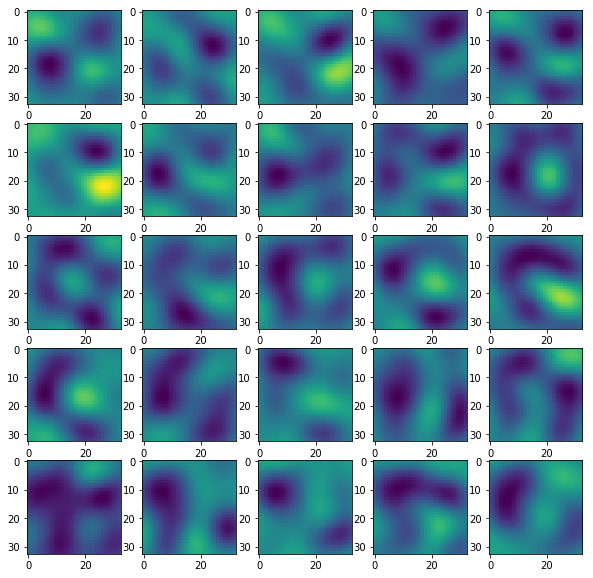

In [223]:
figure(figsize=[10,10])
try:
  for i in range(25):
    subplot(5,5,i+1)
    imshow(filtered_img[non_det][i]/std,vmax=10)
except IndexError:
  pass

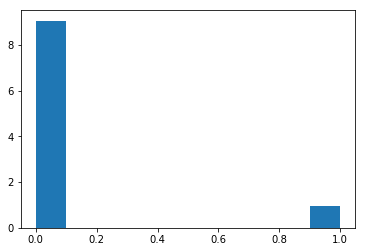

In [224]:
hist(det*1., density=True);

In [233]:
where(det)[0].shape[0]/len(det)

0.09444444444444444

In [226]:
from lenspack.halo.profiles import nfw_profile
from astropy import units as u
from lenspack.image.inversion import ks93, ks93inv

In [227]:
def gen_nfw_shear(x_cen, y_cen, resolution, nx, ny, z, m, zs=None, redshift_distribution=None, como=None):
    """
    returns: a map g1,g2 of size [nx,ny]
    """

    halo = nfw_profile(z=z, c200=1, m200=m, r200=None, cosmology='default')

    resolution = resolution*u.arcmin #arcmin/pixel
    cosmo = halo.cosmo
    d_A = cosmo.angular_diameter_distance(z=z_halo)
    distance_Mpc = (resolution * d_A).to(u.Mpc, u.dimensionless_angles()) # Mpc/pixel

    dist_from_halo = np.zeros((nx, ny)) 
    phi_halo = np.zeros((nx, ny))

    for i in range(ny):
        for j in range(nx):
            dist_from_halo[i,j] = np.sqrt((i-x)**2 + (j-y)**2)
            #phi_halo[i,j] =  np.arccos((j-y) / dist_from_halo[i,j])

    for i in range(ny):
        for j in range(nx):
            if i-x > 0:
                phi_halo[i,j] =  np.arccos((j-y) / dist_from_halo[i,j])
            else:
                phi_halo[i,j] = 2*np.pi - np.arccos((j-y) / dist_from_halo[i,j])

    dist_from_halo = dist_from_halo * distance_Mpc
    phi_halo[x, y] = 0.
    
    gamma_t = halo.gamma_t(r=dist_from_halo, zs=zs)

    gamma_1 = - gamma_t * np.cos(2*phi_halo)
    gamma_2 = - gamma_t * np.sin(2*phi_halo)
    
    return gamma_1, gamma_2

/gpfslocalsup/pub/anaconda-py3/2020.02/envs/tensorflow-gpu-2.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


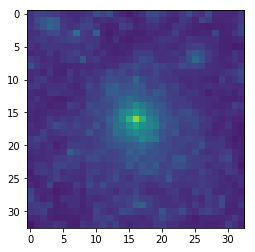

In [228]:
convergence = fits.getdata('../data/ktng/ktng_cosmos_kappa360.fits').astype('float32')
meas_shear = np.stack(ks93inv(convergence, np.zeros_like(convergence)), axis=-1)

resolution = 0.29 #arcmin/pixel
z_halo = 0.5
mass_halo = 6e14
zs = 1

nx = 360# map width pixel
ny = 360 # map height pixel
x = 65 # cluster x coord pixel
y = 130 # cluster y coord pixel

g1, g2 = gen_nfw_shear(x_cen=x, y_cen=y, resolution=resolution, nx=nx, ny=ny, z=z_halo, m=mass_halo, zs=zs)
ke_cluster, kb_cluster = ks93(meas_shear[...,0] + g1, meas_shear[...,1] + g2)

w = 16

vmin = -0.05
vmax = 0.3
imshow(ke_cluster[x-w:x+w+1, y-w:y+w+1], vmin=vmin, vmax=vmax)

0.14632768014443695


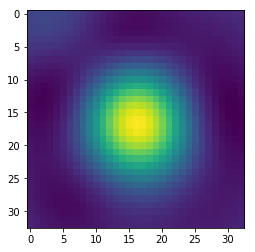

In [229]:
filtered_cluster = lenspack.image.filters.aperture_mass(ke_cluster[x-w:x+w+1, y-w:y+w+1], rad, filter=filter)
print(filtered_cluster[16,16]/0.148)
imshow(filtered_cluster)

In [230]:
# With this setting, we detect the cluster at 5 sigma confidence : 
# 9e13 : around 5.6% of the time, SNR = 1869
# 3e14 : around 77% of the time,  SNR = 4359
# 6e14 : around 96% of the time,  SNR = 6931
# 9e14 : around 100% of the time, SNR = 9013

Text(0,0.5,'% of detection')

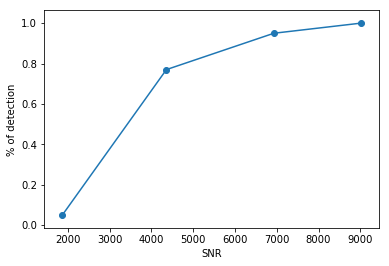

In [231]:
snrs = [1869, 4359, 6931, 9013]
detections = [0.05, 0.77, 0.95, 1.]

plot(snrs, detections)
scatter(snrs, detections)
xlabel('SNR')
ylabel('% of detection')